In [1]:
print("Multimedia Security Experiment 3")

Multimedia Security Experiment 3


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import myipf
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

## 1.图像再量化并对比显示

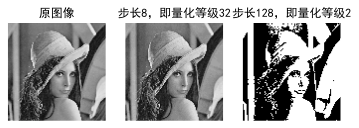

In [9]:
img = plt.imread("images/lena.bmp")
grayImg = np.dot(img, [0.299,0.587,0.114]) # 加权平均后转为单通道灰度图像
_32 = myipf.requalification(grayImg, 8)
_02 = myipf.requalification(grayImg, 128)
plt.subplot(1, 3, 1), plt.imshow(grayImg, cmap='gray'), plt.title("原图像"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(_32, cmap='gray'), plt.title("步长8，即量化等级32"), plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(_02, cmap='gray'), plt.title("步长128，即量化等级2"), plt.axis("off")
plt.show()

## 2.再量化图像与原图像的均方差以及峰值信噪比

In [10]:
myipf.calcMSEPSNR(grayImg, _32)
myipf.calcMSEPSNR(grayImg, _02)

均方差： 5.377342997072
峰值信噪比： 40.82512621771343
均方差： 1346.0837606610717
峰值信噪比： 16.84008275971706


可以看到量化等级为32得到的图像与原图的峰值信噪比为41dB，失真小；
量化等级为2得到的图像与原图的峰值信噪比为17dB，失真大。

## 3.图像的改变

量化等级为2，就相当于二值化了，不过我写的再量化函数并没有取极值，而是取中间值，即量化等级为2时图像两个像素值分别为64和192，可以非常明显的看到伪轮廓，毕竟是64到192的突变。
按我的函数来看，量化等级4一下可以观察到非常明显的伪轮廓，等级4到等级16图像中也存在大大小小的伪轮廓。

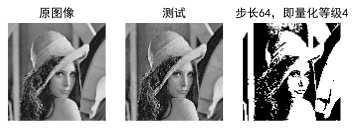

In [11]:
_08 = myipf.requalification(grayImg, 16)
_04 = myipf.requalification(grayImg, 64)
plt.subplot(1, 3, 1), plt.imshow(grayImg, cmap='gray'), plt.title("原图像"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(_08, cmap='gray'), plt.title("测试"), plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(_02, cmap='gray'), plt.title("步长64，即量化等级4"), plt.axis("off")
plt.show()